In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

col_pal = sns.color_palette()
plt.style.use('fivethirtyeight')

import warnings
warnings.filterwarnings('ignore')

In [18]:
wines = pd.read_csv('..\Wine Classification\wine.csv')
wines.sample(10)

,Alcohol,Malic_acid,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color_intensity,Hue,OD280_315_of_diluted_wines,Proline,WineVariety
135,12.60,2.46,2.20,18.5,94,1.62,0.66,0.63,0.94,7.10,0.73,1.58,695,2
69,12.21,1.19,1.75,16.8,151,1.85,1.28,0.14,2.50,2.85,1.28,3.07,718,1
148,13.32,3.24,2.38,21.5,92,1.93,0.76,0.45,1.25,8.42,0.55,1.62,650,2
57,13.29,1.97,2.68,16.8,102,3.00,3.23,0.31,1.66,6.00,1.07,2.84,1270,0
117,12.42,1.61,2.19,22.5,108,2.00,2.09,0.34,1.61,2.06,1.06,2.96,345,1
90,12.08,1.83,2.32,18.5,81,1.60,1.50,0.52,1.64,2.40,1.08,2.27,480,1
152,13.11,1.90,2.75,25.5,116,2.20,1.28,0.26,1.56,7.10,0.61,1.33,425,2
165,13.73,4.36,2.26,22.5,88,1.28,0.47,0.52,1.15,6.62,0.78,1.75,520,2
92,12.69,1.53,2.26,20.7,80,1.38,1.46,0.58,1.62,3.05,0.96,2.06,495,1
23,12.85,1.60,2.52,17.8,95,2.48,2.37,0.26,1.46,3.93,1.09,3.63,1015,0


In [19]:
wines.shape

(178, 14)

In [20]:
wines.columns

Index(['Alcohol', 'Malic_acid', 'Ash', 'Alcalinity', 'Magnesium', 'Phenols',
       'Flavanoids', 'Nonflavanoids', 'Proanthocyanins', 'Color_intensity',
       'Hue', 'OD280_315_of_diluted_wines', 'Proline', 'WineVariety'],
      dtype='object')

## Separate Features and Label

In [24]:
## Features and target

# features = wines.iloc[:,:13]
# target = wines.iloc[:,13]

# X,y = features.values, target.values

# for n in range(0,4):
  #  print('Wine', str(n+1), "\n Features: ", list(X[n]), "\n  Label:", y[n])
  
features = ['Alcohol','Malic_acid','Ash','Alcalinity','Magnesium','Phenols','Flavanoids','Nonflavanoids','Proanthocyanins','Color_intensity','Hue','OD280_315_of_diluted_wines','Proline']
label = 'WineVariety'
X, y = wines[features].values, wines[label].values

for n in range(0,4):
    print("Wine", str(n+1), "\n  Features:",list(X[n]), "\n  Label:", y[n])

Wine 1 
  Features: [14.23, 1.71, 2.43, 15.6, 127.0, 2.8, 3.06, 0.28, 2.29, 5.64, 1.04, 3.92, 1065.0] 
  Label: 0
Wine 2 
  Features: [13.2, 1.78, 2.14, 11.2, 100.0, 2.65, 2.76, 0.26, 1.28, 4.38, 1.05, 3.4, 1050.0] 
  Label: 0
Wine 3 
  Features: [13.16, 2.36, 2.67, 18.6, 101.0, 2.8, 3.24, 0.3, 2.81, 5.68, 1.03, 3.17, 1185.0] 
  Label: 0
Wine 4 
  Features: [14.37, 1.95, 2.5, 16.8, 113.0, 3.85, 3.49, 0.24, 2.18, 7.8, 0.86, 3.45, 1480.0] 
  Label: 0


## Feature Distribution

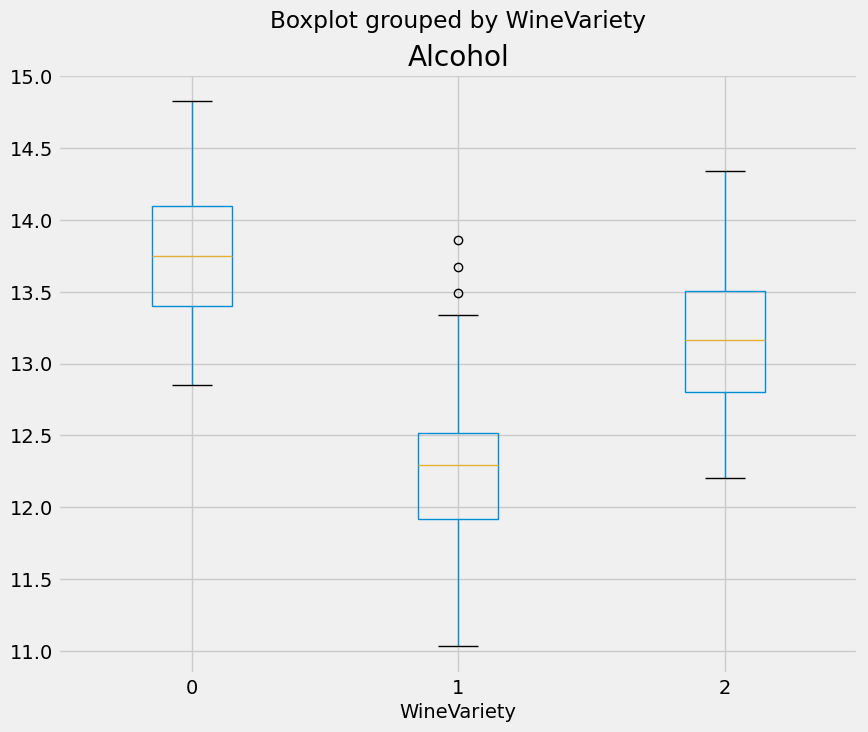

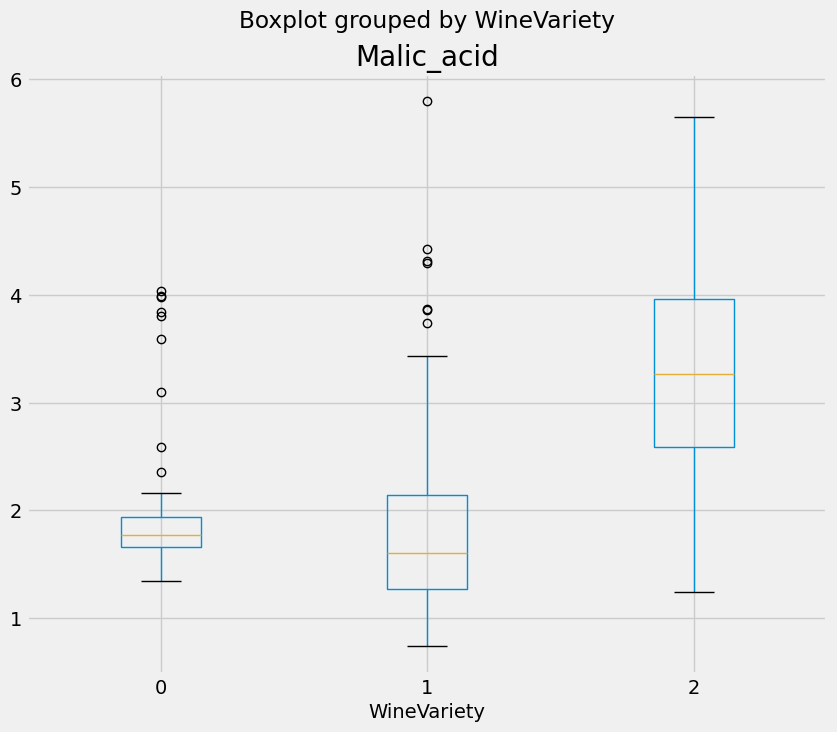

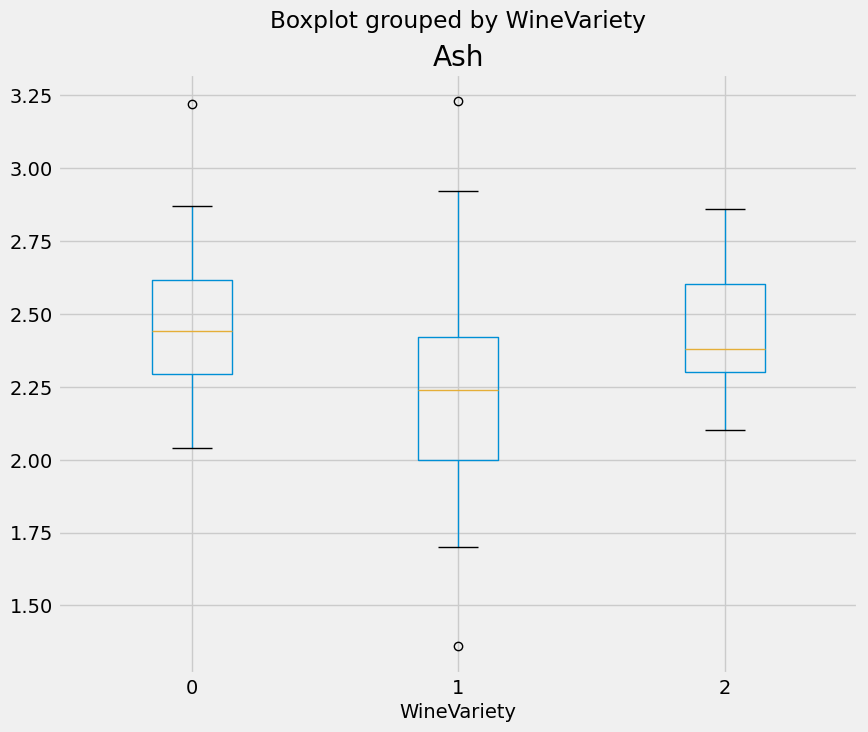

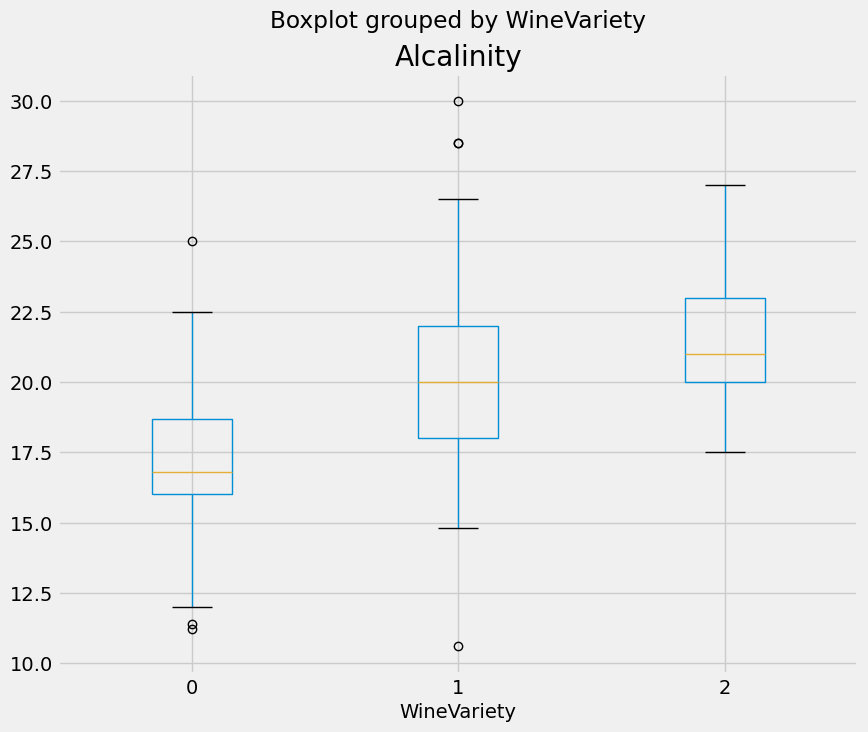

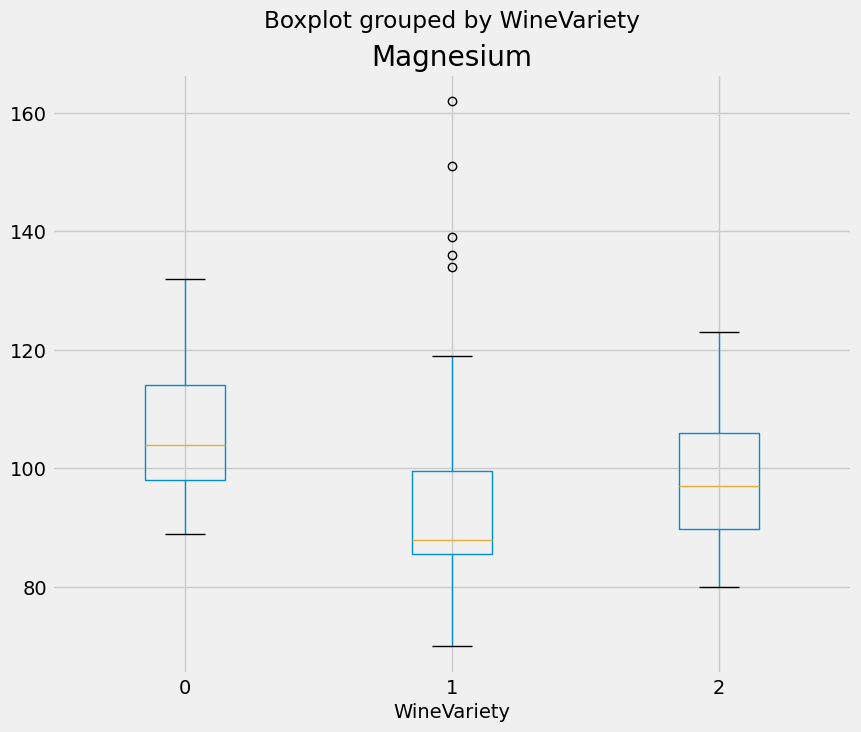

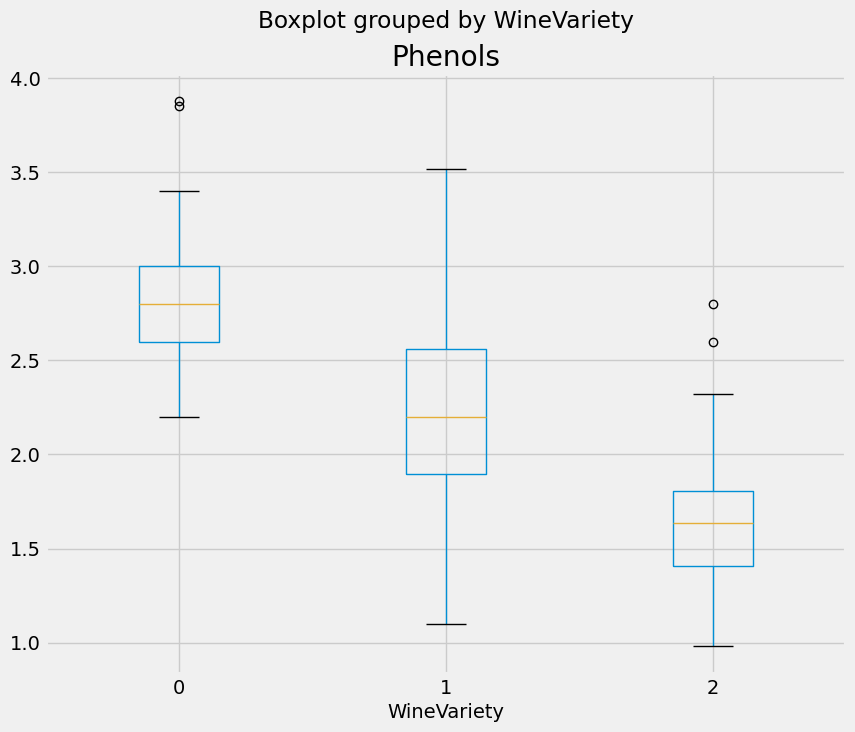

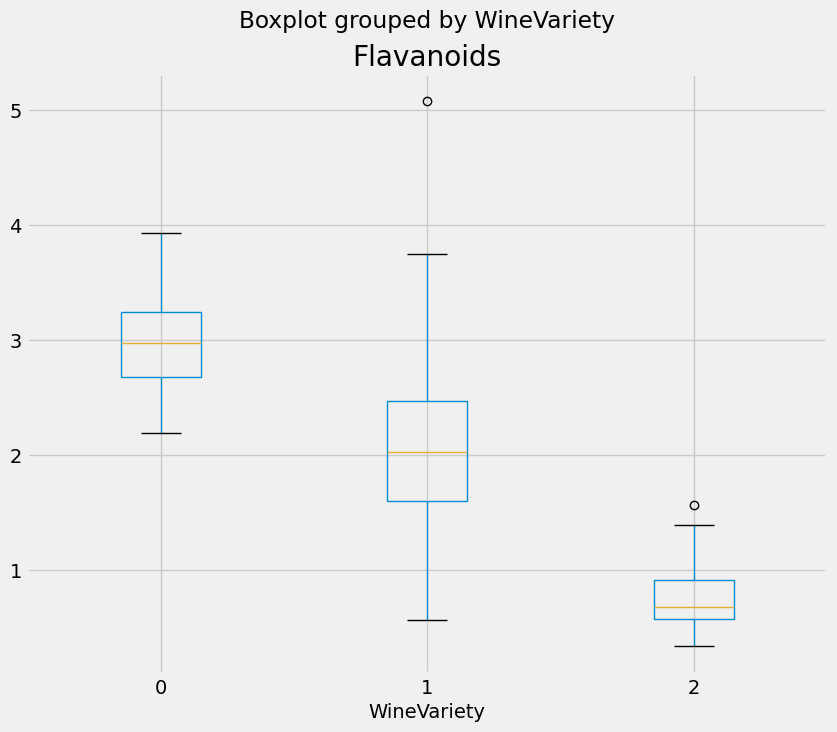

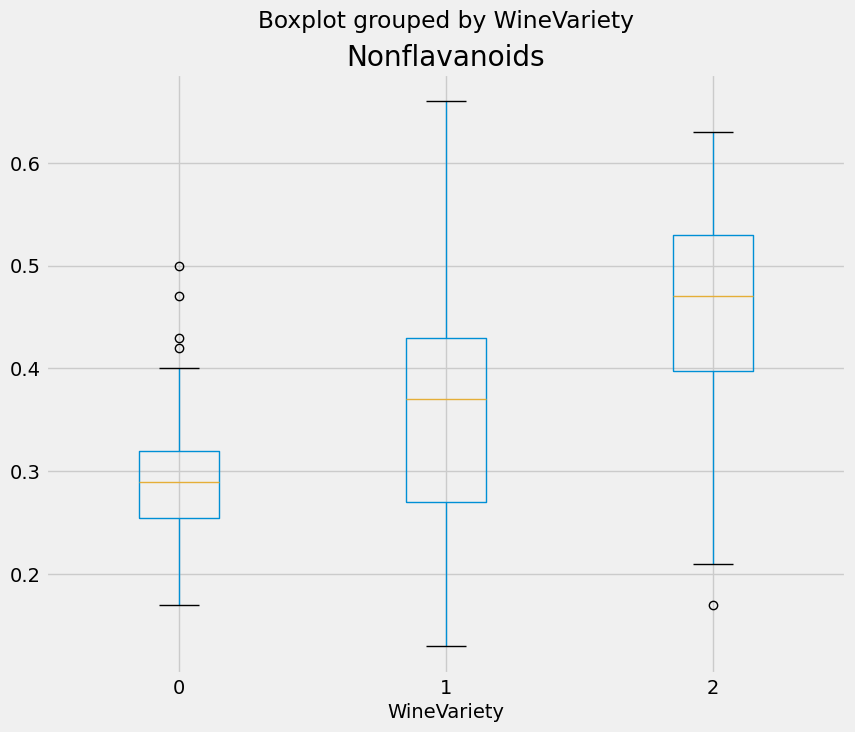

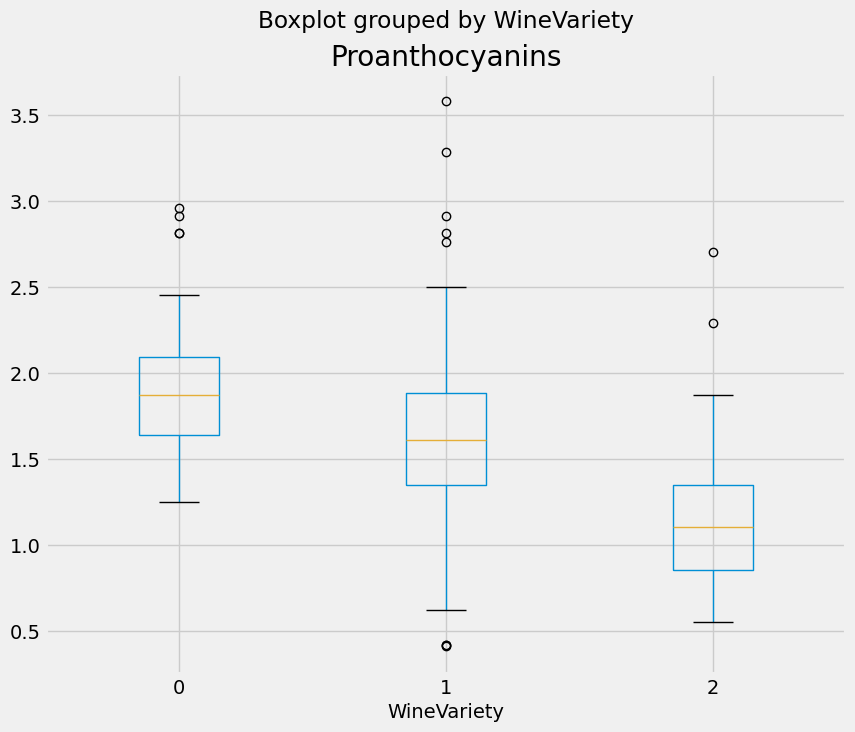

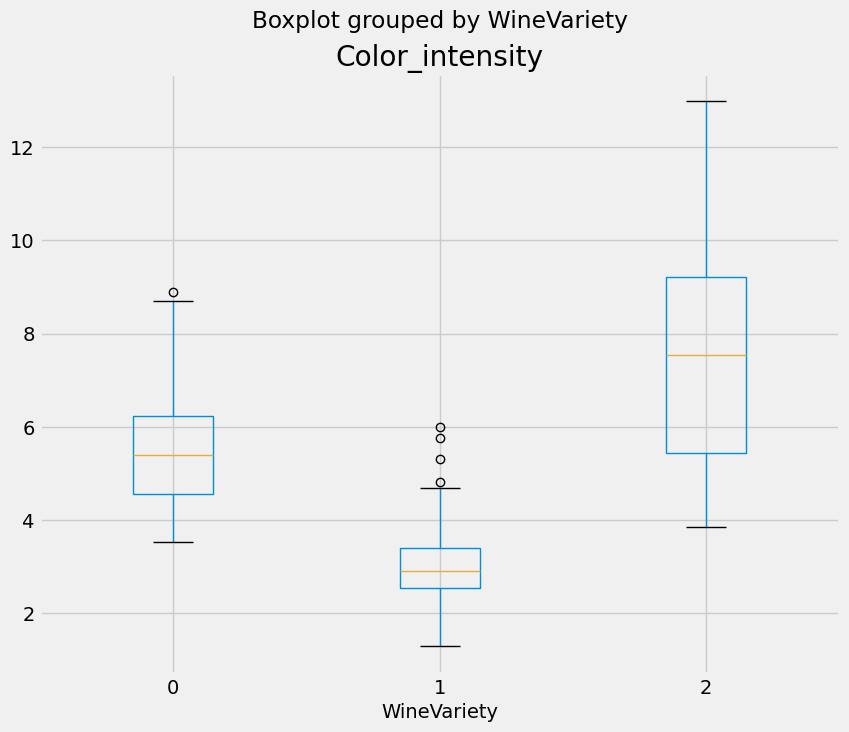

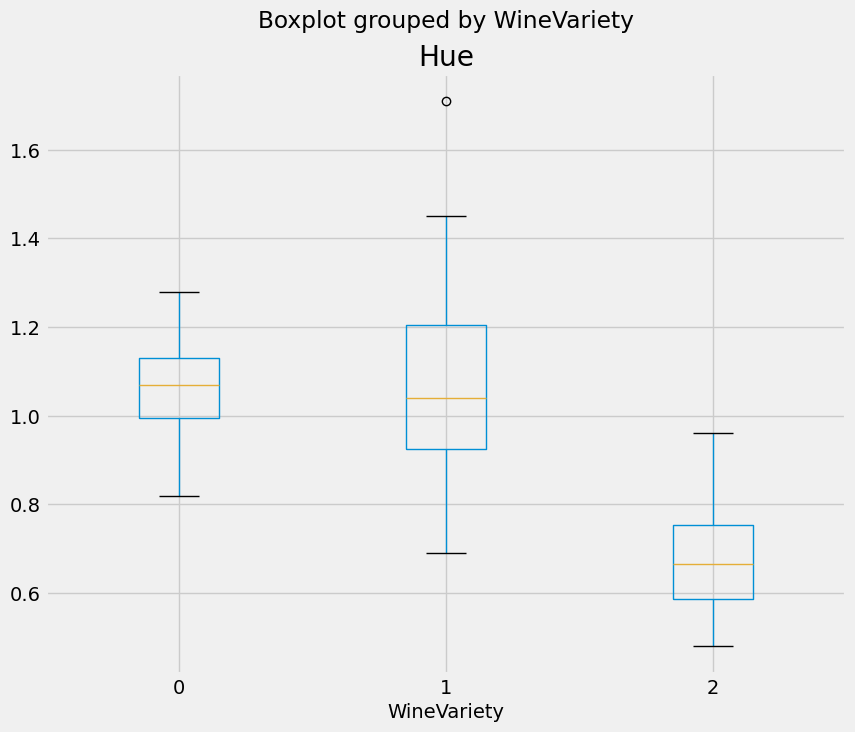

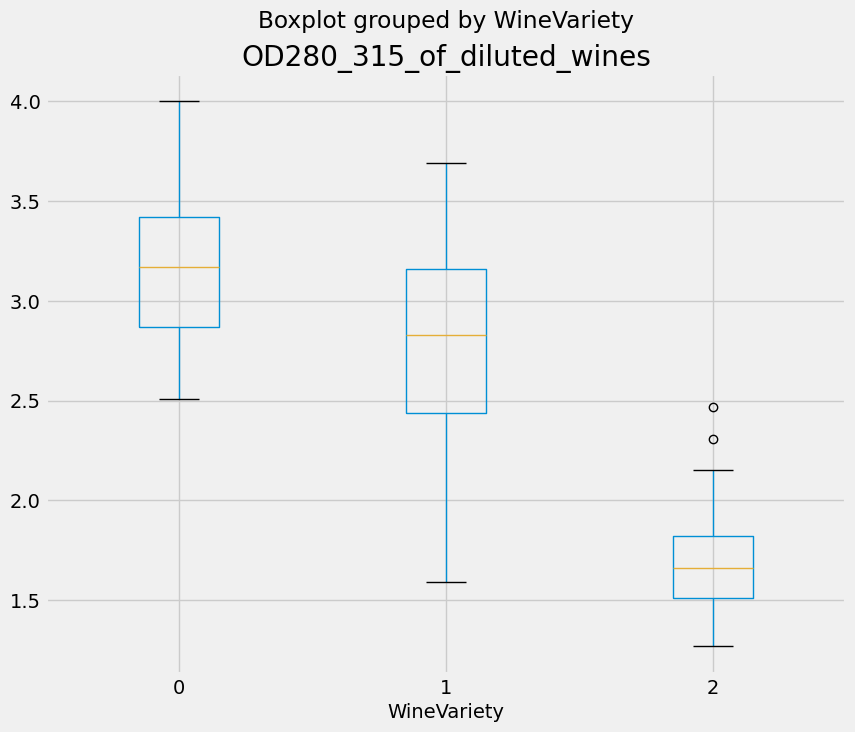

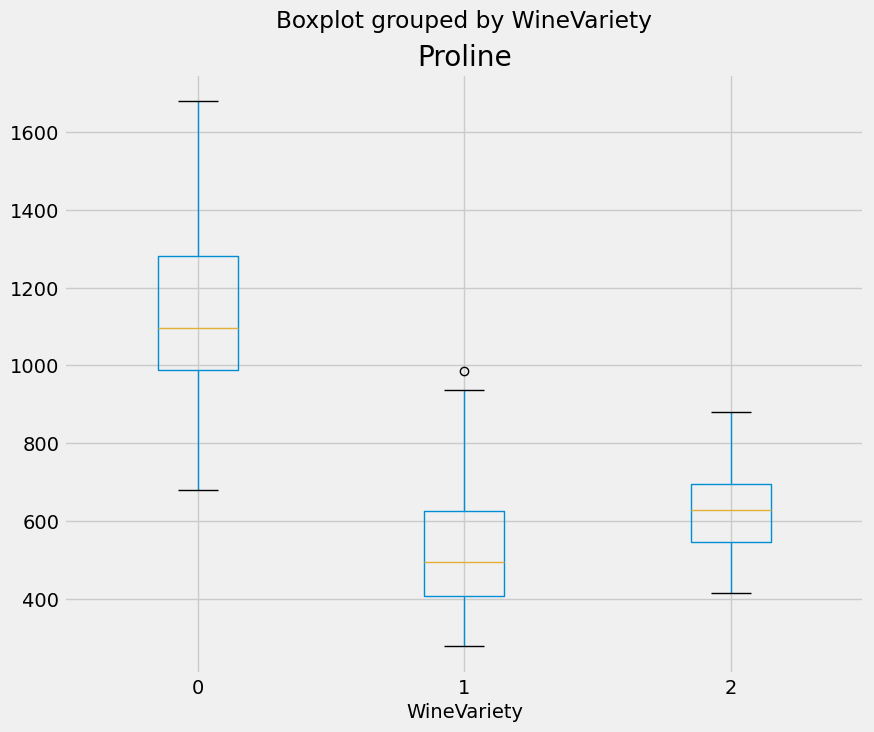

In [27]:
for col in features:
    wines.boxplot(column=col, by=label, figsize=(10,8))
    plt.title(col)
plt.show()

## Splitting the data

In [29]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=0)

print(f'Training Set: {X_train.shape[0]}\nTest Set: {X_test.shape[0]}')

Training Set: 124
Test Set: 54


## Standardizing the features and training model

In [30]:
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression

In [37]:
# Define preprocessing for numeric columns (scale them)

feature_columns = [0,1,2,3,4,5,6]
feature_transformer = Pipeline(steps=[
                        ('scaler', StandardScaler())])

# Create Preprocessing Steps
preprocessor = ColumnTransformer(
    transformers=[
        ('preprocess', feature_transformer, feature_columns)])

# Create Training Pipeline
pipeline = Pipeline(steps = [
                    ('preprocessor', preprocessor),
                    ('regressor', LogisticRegression(solver='lbfgs', multi_class='auto'))])

# Fit the pipeline

model = pipeline.fit(X_train, y_train)
print(model)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('preprocess',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  [0, 1, 2, 3, 4, 5, 6])])),
                ('regressor', LogisticRegression())])


## Evaluate Model

In [38]:
from sklearn.metrics import accuracy_score, precision_score,recall_score, confusion_matrix

## Predictions

predictions = model.predict(X_test)

In [41]:
# Get Metrics

print(f'Overall Accuracy: {accuracy_score(y_test, predictions)}')
print(f"Overall Precision: {precision_score(y_test, predictions, average='macro')}")
print(f"Overall Recall: {recall_score(y_test, predictions, average='macro')}")

Overall Accuracy: 0.9814814814814815
Overall Precision: 0.9855072463768115
Overall Recall: 0.9743589743589745


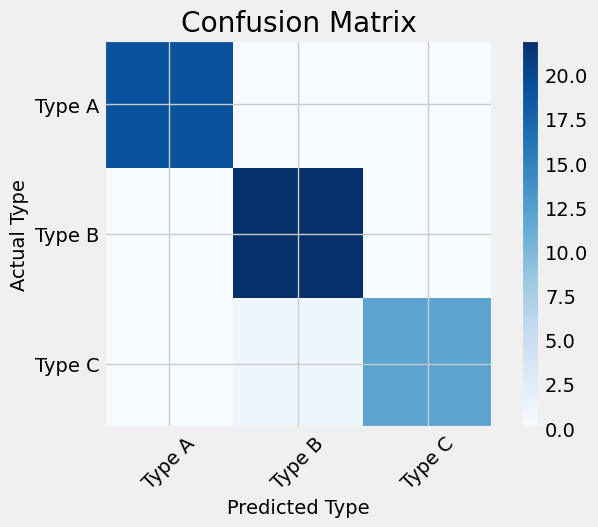

In [43]:
# Plotting Confusion Matrix

cm = confusion_matrix(y_test, predictions)
classes = ['Type A', 'Type B', 'Type C']

plt.imshow(cm, interpolation="nearest", cmap=plt.cm.Blues)
plt.colorbar()
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Type')
plt.ylabel('Actual Type')
plt.show()

In [45]:
from sklearn.metrics import roc_auc_score, roc_curve

# Get class probability scores

probabilities = model.predict_proba(X_test)

auc = roc_auc_score(y_test, probabilities, multi_class='ovr')
print('Average AUC:', auc)

# Get ROC metrics for each class
fpr = {}
tpr = {}
thresh ={}
for i in range(len(classes)):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, probabilities[:,i], pos_label=i)
    
    

Average AUC: 1.0


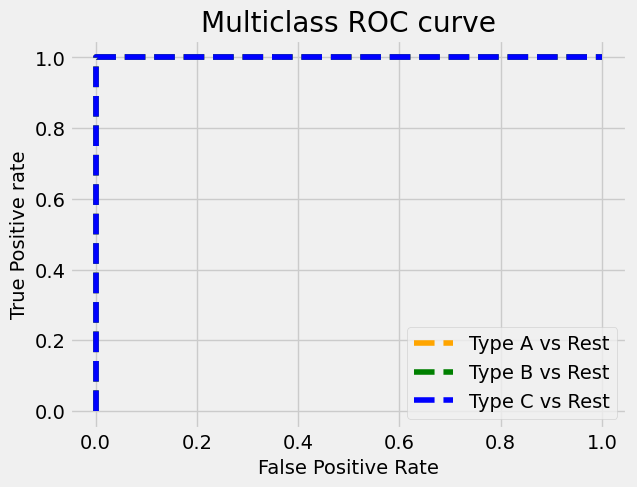

In [46]:
# Plotting ROC chart

plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label=classes[0] + ' vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label=classes[1] + ' vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label=classes[2] + ' vs Rest')
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.show()

## Saving the model

In [47]:
import joblib

filename = '.wine_classifier.pkl'
joblib.dump(model, filename)

['.wine_classifier.pkl']

## Use the model with new data observation

In [48]:
## Load the saved model

model = joblib.load(filename)

# Get predictions for two new wine samples
X_new = np.array([[13.72,1.43,2.5,16.7,108,3.4,3.67,0.19,2.04,6.8,0.89,2.87,1285],
                  [12.37,0.94,1.36,10.6,88,1.98,0.57,0.28,0.42,1.95,1.05,1.82,520]])


In [50]:
# Call the web service, passing the input data
predictions = model.predict(X_new)

# Get the predicted classes.
for prediction in predictions:
    print(prediction, '(' + classes[prediction] +')')

0 (Type A)
1 (Type B)
